In [55]:
import xarray as xr

#rlzn to do
rlzn_num = 10

fdir = '[CMIP6 MSFTMZ PATH]'
fname = '/msftmz_Omon_MPI-ESM1-2-HR_historical_r{}*.nc'.format(rlzn_num)
print(fdir+fname)
f = xr.open_mfdataset(fdir+fname,combine='by_coords')
f


/Volumes/HDDBackup/CMIP6/Updated_AMOCI/raw_msftmzhistorical//msftmz_Omon_MPI-ESM1-2-HR_historical_r10*.nc


<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, basin: 3, lev: 41, lat: 180)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    sector     (basin) |S21 dask.array<chunksize=(3,), meta=np.ndarray>
  * lev        (lev) float64 0.0 12.0 22.0 32.0 ... 4.92e+03 5.42e+03 6.02e+03
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds, basin
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(60, 2), meta=np.ndarray>
    lev_bnds   (time, lev, bnds) float64 dask.array<chunksize=(60, 41, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(60, 180, 2), meta=np.ndarray>
    msftmz     (time, basin, lev, lat) float32 dask.array<chunksize=(60, 3, 41, 180), meta=np.ndarray>
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  164358.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:            msftmz
    variant_label:          r10i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/99687e39-adfa-48d3-a427-b9c692b7caed

In [56]:
print(f.sector.values)
atl_idx = 1 # index of atlantic basin

[b'global_ocean         ' b'atlantic_arctic_ocean'
 b'indian_pacific_ocean ']


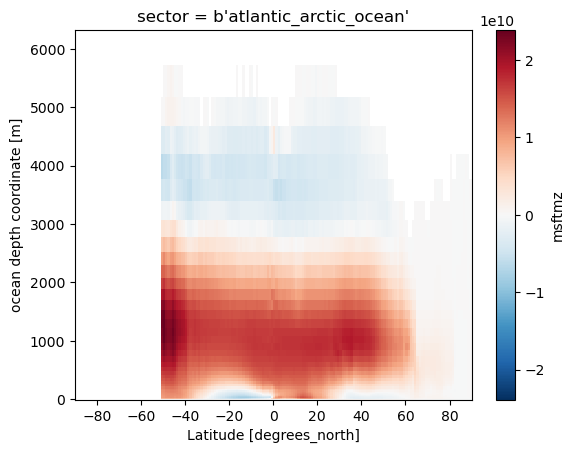

In [57]:
# 2-D structure of AMOC
f['msftmz'].sel(basin=atl_idx).mean('time').plot()

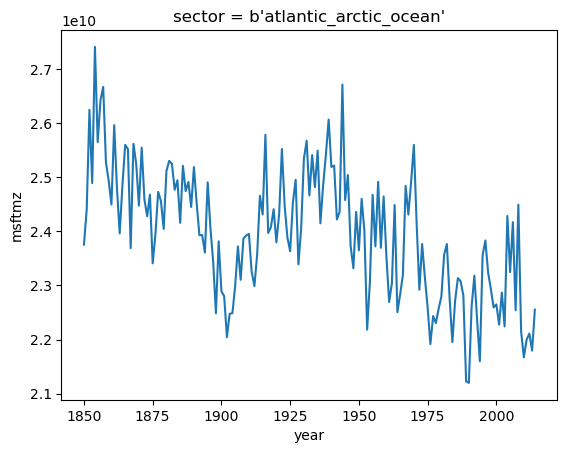

In [58]:
def AMOCI(msftmz,atl_idx=atl_idx):
    # unit: kg/s --> Sv
    return msftmz.sel(basin=atl_idx).where(msftmz.lev>500).where(msftmz.lat>-10).max(('lev','lat'))

def anu(var):
    # annual mean
    return var.groupby('time.year').mean('time')

amoc1 = anu(AMOCI(f['msftmz']))
amoc1.plot()
amoc1.values
path='[EXPORT PATH]'


filename = 'AMOCI_historical_r{}.nc'.format(rlzn_num)
amoc1.to_netcdf(path+filename)